We consider an option with the payoff

$$
\text{Payoff} = \max\left(\frac{S_{T_2} - S_{T_1}}{S_{T_1}} - K,\, 0\right),
$$

which can be rewritten as

$$
\max\left(\frac{S_{T_2}}{S_{T_1}} - (1+K),\, 0\right).
$$

Under the risk–neutral dynamics

$$
dS(t) = r S(t)\,dt + \sigma S(t)\,dW(t),
$$

the stock price at time \(T_1\) is given by

$$
S_{T_1} = S_0 \exp\left[\left(r-\frac{1}{2}\sigma^2\right)T_1 + \sigma\sqrt{T_1}\,Z_1\right],
$$

and conditionally at \(T_2\) by

$$
S_{T_2} = S_{T_1}\exp\left[\left(r-\frac{1}{2}\sigma^2\right)(T_2-T_1) + \sigma\sqrt{T_2-T_1}\,Z_2\right].
$$

Defining the ratio

$$
Y = \frac{S_{T_2}}{S_{T_1}},
$$

its logarithm is normally distributed:

$$
\ln Y \sim \mathcal{N}\left(\left(r-\frac{1}{2}\sigma^2\right)(T_2-T_1),\, \sigma^2(T_2-T_1)\right).
$$

The option payoff thus becomes

$$
\max\left(Y-(1+K),\,0\right).
$$

In the Monte Carlo approach, we compute the discounted payoff at time \(T_2\) using the discount factor

$$
e^{-rT_2}.
$$

For the analytic Black–Scholes price, note that the forward price of the ratio is

$$
F = e^{r(T_2-T_1)}.
$$

We then define

$$
d_1 = \frac{\ln\left(\frac{F}{1+K}\right) + \frac{1}{2}\sigma^2(T_2-T_1)}{\sigma\sqrt{T_2-T_1}}, \quad d_2 = d_1-\sigma\sqrt{T_2-T_1}.
$$

and the Black–Scholes price is given by

$$
\text{Price}_{BS} = e^{-rT_2}\left(F\,N(d_1) - (1+K)\,N(d_2)\right).
$$

Comparing the Monte Carlo simulation with the Black–Scholes formula over a range of strike shifts \(K\) demonstrates that both pricing methodologies yield consistent results.


K	MC Price	BS Price
0.000	0.240055	0.239837
0.022	0.229544	0.229326
0.044	0.219397	0.219179
0.067	0.209611	0.209392
0.089	0.200180	0.199962
0.111	0.191098	0.190882
0.133	0.182361	0.182148
0.156	0.173961	0.173752
0.178	0.165890	0.165687
0.200	0.158146	0.157945


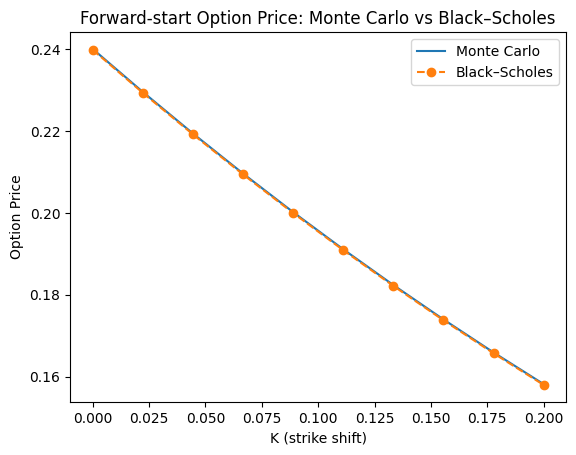

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# ------------------------
# Parameters (feel free to adjust)
# ------------------------
r = 0.05           # risk-free rate
sigma = 0.2        # volatility
T1 = 1.0           # time at which S_T1 is observed
T2 = 5.0           # option maturity time (and observation of S_T2)
S0 = 1.0           # initial stock price (the ratio S_T2/S_T1 makes S0 irrelevant)
n_sim = 1_000_000  # number of Monte Carlo samples

# ------------------------
# Monte Carlo simulation
# ------------------------
np.random.seed(42)

# Simulate S(T1)
Z1 = np.random.normal(0, 1, n_sim)
S_T1 = S0 * np.exp((r - 0.5 * sigma**2) * T1 + sigma * np.sqrt(T1) * Z1)

# Simulate S(T2) conditionally: S(T2) = S(T1)*exp(...)
Z2 = np.random.normal(0, 1, n_sim)
S_T2 = S_T1 * np.exp((r - 0.5 * sigma**2) * (T2 - T1) + sigma * np.sqrt(T2 - T1) * Z2)

# Calculate the ratio Y = S(T2)/S(T1)
ratio = S_T2 / S_T1

# ------------------------
# Define strike range
# ------------------------
# The payoff becomes max(ratio - (1+K), 0)
K_range = np.linspace(0.0, 0.2, 10)  # You can test strikes from 0 to 0.2
prices_MC = []
prices_BS = []

# Discount factor (payoff is at time T2)
discount = np.exp(-r * T2)

# Forward expectation for the ratio:
F = np.exp(r * (T2 - T1))
T = T2 - T1  # time length from T1 to T2

# For each strike shift K, compute both Monte Carlo and Black–Scholes prices.
for K in K_range:
    strike_ratio = 1 + K  # the effective strike in the ratio space
    # Monte Carlo price computation
    payoff = np.maximum(ratio - strike_ratio, 0)
    price_mc = discount * np.mean(payoff)
    prices_MC.append(price_mc)
    
    # Black–Scholes formula for call on Y:
    d1 = (np.log(F / strike_ratio) + 0.5 * sigma**2 * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    price_bs = discount * (F * norm.cdf(d1) - strike_ratio * norm.cdf(d2))
    prices_BS.append(price_bs)

# ------------------------
# Display and plot the prices
# ------------------------
print("K\tMC Price\tBS Price")
for K, mc, bs in zip(K_range, prices_MC, prices_BS):
    print(f"{K:.3f}\t{mc:.6f}\t{bs:.6f}")

plt.plot(K_range, prices_MC, label="Monte Carlo")
plt.plot(K_range, prices_BS, "o--", label="Black–Scholes")
plt.xlabel("K (strike shift)")
plt.ylabel("Option Price")
plt.title("Forward-start Option Price: Monte Carlo vs Black–Scholes")
plt.legend()
plt.show()
